In [1]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [4]:
print(train_df.columns)


Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


combined_df = pd.concat([train_df.drop('target', axis=1), test_df])

combined_df['text_length'] = combined_df['text'].apply(len)


X_train = combined_df.iloc[:len(train_df)]
X_test = combined_df.iloc[len(train_df):]
y_train = train_df['target']


pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'vect__max_features': [1000, 2000, 3000],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 5, 10, 20]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train['text'], y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

test_predictions = grid_search.predict(X_test['text'])

submission_df = pd.DataFrame({'id': test_df['id'], 'target': test_predictions})
submission_df.to_csv('submission.csv', index=False)


Best Parameters: {'clf__max_depth': 20, 'clf__n_estimators': 300, 'vect__max_features': 2000}
Best Score: 0.654281136459526


In [20]:
test_predictions = grid_search.predict(X_test['text'])


submission_df = pd.DataFrame({'id': test_df['id'], 'target': test_predictions})
submission_df.to_csv('submission.csv', index=False)


In [21]:

test_predictions = grid_search.predict(X_test['text'])
print("Test Predictions:", test_predictions)


submission_df = pd.DataFrame({'id': test_df['id'], 'target': test_predictions})
submission_df.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully.")


Test Predictions: [0 0 0 ... 1 0 0]
Submission file 'submission.csv' created successfully.


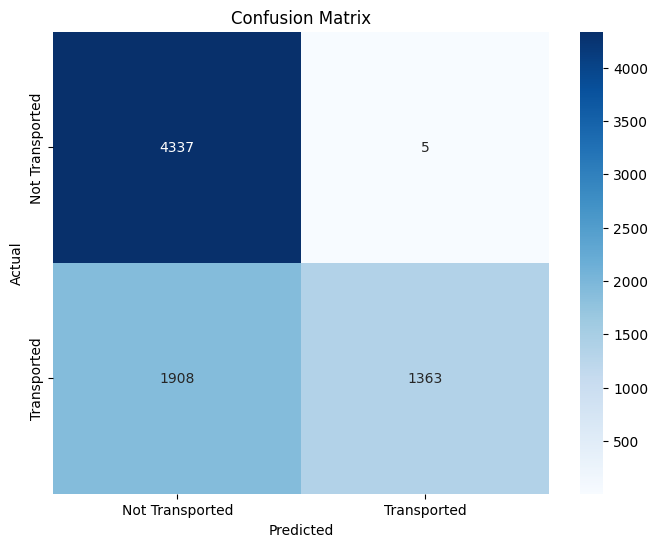

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_train, grid_search.predict(X_train['text']))


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
